<a href="https://colab.research.google.com/github/it20649708/Deep-Learning-Lab02-2023/blob/main/ex_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(371, 436, 3)

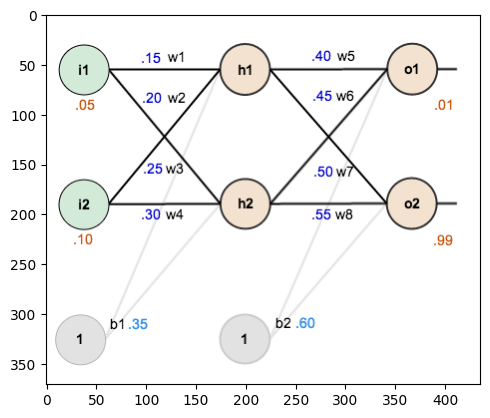

In [11]:
import cv2
from matplotlib import pyplot as plt
import numpy as np


im = cv2.imread('/content/sample_data/image.png')
plt.imshow(im)

im.shape



# New section

In [10]:
##############################################################################
# Implementation of a A Step by Step Backpropagation Example by Matt Mazur
# https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/
##############################################################################

# Original code: https://github.com/vendidad/DS-repo/blob/master/Backpropagation%20-%20Consolidated%20Script.ipynb


import numpy as np
np.set_printoptions(precision=4)

def initialize():
    X = np.array([[0.05, 0.10]])      # Inputs
    W1 = np.array([[0.15,0.20], [0.25,0.30]])      # Weights to calculate outputs for hidden layer 1
    b1 = 0.35      # Bias for hidden layer 1
    W2 = np.array([[0.40,0.45], [0.50,0.55]])     # Weights to calculate outputs for output layer
    b2 = 0.60      # Bias for output layer
    Y = np.array([[0.01, 0.99]])      # Desired output
    learning_rate = 0.5
    no_of_iter = int(100)
    return (X, W1, b1, W2, b2, Y, learning_rate, no_of_iter)

def forward_pass (X, W1, b1, W2, b2, Y):
    ### Forward pass: Calculate hidden layer 1 (there is only 1 hidden layer in this example)
    Z1 = np.dot(X,W1.T) + b1      # WtX + b
    A1 = 1/(1 + np.exp(-Z1))       # Sigmoid(z) = 1 / (1 + e^(-z))
    ### Forward pass: Calculate output layer
    Z2 = np.dot(A1,W2.T) + b2      # WtX + b
    A2 = 1/(1 + np.exp(-Z2))       # Sigmoid(z) = 1 / (1 + e^(-z))
    ### Calculate error/cost function
    E = np.sum(1/2*np.square(Y - A2))      # squared error function
    return (A1, A2, E)

def back_propagation(X, W1, W2, Y, A1, A2, learning_rate):
    ### Back propogation
    ### Adjust W2
    dEdA2 = A2 - Y
    dA2dZ2 = np.multiply (A2,1-A2)
    dZ2dW2 = A1
    dEdW2 = dEdA2 * dA2dZ2 * dZ2dW2
    W2_adj = W2 - learning_rate * dEdW2.T
    W2 = W2_adj
    ### Adjust W1
    dZ2dA1 = W2.T
    dA1dZ1 = np.multiply(A1,1-A1)
    dZ1dW1 = X
    dEdW1 = dEdA2 * dA2dZ2 * dZ2dA1 * dA1dZ1 * dZ1dW1
    W1_adj = W1 - learning_rate * dEdW1.T
    W1 = W1_adj
    return (W1, W2)

def main():
    (X, W1, b1, W2, b2, Y, learning_rate, no_of_iter) = initialize()
    for iter in range (0,no_of_iter):
        (A1, A2, E) = forward_pass(X, W1, b1, W2, b2, Y)
        (W1, W2) = back_propagation(X, W1, W2, Y, A1, A2, learning_rate)
    print ('W1 = {} \n\n W2 = {} \n\n Output = {} \n Desired output = {} \n Error = {}'.format(W1, W2, A2, Y, E))

main()

W1 = [[0.1826 0.2304]
 [0.2705 0.3217]] 

 W2 = [[-1.819  -1.769 ]
 [ 1.1239  1.1739]] 

 Output = [[0.178  0.8771]] 
 Desired output = [[0.01 0.99]] 
 Error = 0.020492276763740064


In [12]:
def initialize():
    X = np.array([[0.05, 0.10]])      # Inputs
    W1 = np.array([[0.15,0.20], [0.25,0.30]])      # Weights to calculate outputs for hidden layer 1
    b1 = 0.35      # Bias for hidden layer 1
    W2 = np.array([[0.40,0.45], [0.50,0.55]])     # Weights to calculate outputs for output layer
    b2 = 0.60      # Bias for output layer
    Y = np.array([[0.01, 0.99]])      # Desired output
    learning_rate = 0.5
    no_of_iter = int(150)
    return (X, W1, b1, W2, b2, Y, learning_rate, no_of_iter)

def forward_pass (X, W1, b1, W2, b2, Y):
    ### Forward pass: Calculate hidden layer 1 (there is only 1 hidden layer in this example)
    Z1 = np.dot(X,W1.T) + b1      # WtX + b
    A1 = 1/(1 + np.exp(-Z1))       # Sigmoid(z) = 1 / (1 + e^(-z))
    ### Forward pass: Calculate output layer
    Z2 = np.dot(A1,W2.T) + b2      # WtX + b
    A2 = 1/(1 + np.exp(-Z2))       # Sigmoid(z) = 1 / (1 + e^(-z))
    ### Calculate error/cost function
    E = np.sum(1/2*np.square(Y - A2))      # squared error function
    return (A1, A2, E)

def back_propagation(X, W1, W2, Y, A1, A2, learning_rate):
    ### Back propogation
    ### Adjust W2
    dEdA2 = A2 - Y
    dA2dZ2 = np.multiply (A2,1-A2)
    dZ2dW2 = A1
    dEdW2 = dEdA2 * dA2dZ2 * dZ2dW2
    W2_adj = W2 - learning_rate * dEdW2.T
    W2 = W2_adj
    ### Adjust W1
    dZ2dA1 = W2.T
    dA1dZ1 = np.multiply(A1,1-A1)
    dZ1dW1 = X
    dEdW1 = dEdA2 * dA2dZ2 * dZ2dA1 * dA1dZ1 * dZ1dW1
    W1_adj = W1 - learning_rate * dEdW1.T
    W1 = W1_adj
    return (W1, W2)

def main():
    (X, W1, b1, W2, b2, Y, learning_rate, no_of_iter) = initialize()
    for iter in range (0,no_of_iter):
        (A1, A2, E) = forward_pass(X, W1, b1, W2, b2, Y)
        (W1, W2) = back_propagation(X, W1, W2, Y, A1, A2, learning_rate)
    print ('W1 = {} \n\n W2 = {} \n\n Output = {} \n Desired output = {} \n Error = {}'.format(W1, W2, A2, Y, E))

main()

W1 = [[0.1936 0.2411]
 [0.2779 0.3295]] 

 W2 = [[-2.0954 -2.0454]
 [ 1.2776  1.3276]] 

 Output = [[0.1342 0.8957]] 
 Desired output = [[0.01 0.99]] 
 Error = 0.012159339103135922


In [13]:
def initialize():
    X = np.array([[0.05, 0.10]])      # Inputs
    W1 = np.array([[0.15,0.20], [0.25,0.30]])      # Weights to calculate outputs for hidden layer 1
    b1 = 0.35      # Bias for hidden layer 1
    W2 = np.array([[0.40,0.45], [0.50,0.55]])     # Weights to calculate outputs for output layer
    b2 = 0.60      # Bias for output layer
    Y = np.array([[0.01, 0.99]])      # Desired output
    learning_rate = 0.5
    no_of_iter = int(200)
    return (X, W1, b1, W2, b2, Y, learning_rate, no_of_iter)

def forward_pass (X, W1, b1, W2, b2, Y):
    ### Forward pass: Calculate hidden layer 1 (there is only 1 hidden layer in this example)
    Z1 = np.dot(X,W1.T) + b1      # WtX + b
    A1 = 1/(1 + np.exp(-Z1))       # Sigmoid(z) = 1 / (1 + e^(-z))
    ### Forward pass: Calculate output layer
    Z2 = np.dot(A1,W2.T) + b2      # WtX + b
    A2 = 1/(1 + np.exp(-Z2))       # Sigmoid(z) = 1 / (1 + e^(-z))
    ### Calculate error/cost function
    E = np.sum(1/2*np.square(Y - A2))      # squared error function
    return (A1, A2, E)

def back_propagation(X, W1, W2, Y, A1, A2, learning_rate):
    ### Back propogation
    ### Adjust W2
    dEdA2 = A2 - Y
    dA2dZ2 = np.multiply (A2,1-A2)
    dZ2dW2 = A1
    dEdW2 = dEdA2 * dA2dZ2 * dZ2dW2
    W2_adj = W2 - learning_rate * dEdW2.T
    W2 = W2_adj
    ### Adjust W1
    dZ2dA1 = W2.T
    dA1dZ1 = np.multiply(A1,1-A1)
    dZ1dW1 = X
    dEdW1 = dEdA2 * dA2dZ2 * dZ2dA1 * dA1dZ1 * dZ1dW1
    W1_adj = W1 - learning_rate * dEdW1.T
    W1 = W1_adj
    return (W1, W2)

def main():
    (X, W1, b1, W2, b2, Y, learning_rate, no_of_iter) = initialize()
    for iter in range (0,no_of_iter):
        (A1, A2, E) = forward_pass(X, W1, b1, W2, b2, Y)
        (W1, W2) = back_propagation(X, W1, W2, Y, A1, A2, learning_rate)
    print ('W1 = {} \n\n W2 = {} \n\n Output = {} \n Desired output = {} \n Error = {}'.format(W1, W2, A2, Y, E))

main()

W1 = [[0.2015 0.2488]
 [0.2841 0.3359]] 

 W2 = [[-2.2728 -2.2228]
 [ 1.3931  1.4431]] 

 Output = [[0.1112 0.908 ]] 
 Desired output = [[0.01 0.99]] 
 Error = 0.008481612567745397


In [14]:
def initialize():
    X = np.array([[0.05, 0.10]])      # Inputs
    W1 = np.array([[0.15,0.20], [0.25,0.30]])      # Weights to calculate outputs for hidden layer 1
    b1 = 0.35      # Bias for hidden layer 1
    W2 = np.array([[0.40,0.45], [0.50,0.55]])     # Weights to calculate outputs for output layer
    b2 = 0.60      # Bias for output layer
    Y = np.array([[0.01, 0.99]])      # Desired output
    learning_rate = 0.5
    no_of_iter = int(300)
    return (X, W1, b1, W2, b2, Y, learning_rate, no_of_iter)

def forward_pass (X, W1, b1, W2, b2, Y):
    ### Forward pass: Calculate hidden layer 1 (there is only 1 hidden layer in this example)
    Z1 = np.dot(X,W1.T) + b1      # WtX + b
    A1 = 1/(1 + np.exp(-Z1))       # Sigmoid(z) = 1 / (1 + e^(-z))
    ### Forward pass: Calculate output layer
    Z2 = np.dot(A1,W2.T) + b2      # WtX + b
    A2 = 1/(1 + np.exp(-Z2))       # Sigmoid(z) = 1 / (1 + e^(-z))
    ### Calculate error/cost function
    E = np.sum(1/2*np.square(Y - A2))      # squared error function
    return (A1, A2, E)

def back_propagation(X, W1, W2, Y, A1, A2, learning_rate):
    ### Back propogation
    ### Adjust W2
    dEdA2 = A2 - Y
    dA2dZ2 = np.multiply (A2,1-A2)
    dZ2dW2 = A1
    dEdW2 = dEdA2 * dA2dZ2 * dZ2dW2
    W2_adj = W2 - learning_rate * dEdW2.T
    W2 = W2_adj
    ### Adjust W1
    dZ2dA1 = W2.T
    dA1dZ1 = np.multiply(A1,1-A1)
    dZ1dW1 = X
    dEdW1 = dEdA2 * dA2dZ2 * dZ2dA1 * dA1dZ1 * dZ1dW1
    W1_adj = W1 - learning_rate * dEdW1.T
    W1 = W1_adj
    return (W1, W2)

def main():
    (X, W1, b1, W2, b2, Y, learning_rate, no_of_iter) = initialize()
    for iter in range (0,no_of_iter):
        (A1, A2, E) = forward_pass(X, W1, b1, W2, b2, Y)
        (W1, W2) = back_propagation(X, W1, W2, Y, A1, A2, learning_rate)
    print ('W1 = {} \n\n W2 = {} \n\n Output = {} \n Desired output = {} \n Error = {}'.format(W1, W2, A2, Y, E))

main()

W1 = [[0.2126 0.2596]
 [0.2941 0.3463]] 

 W2 = [[-2.5022 -2.4522]
 [ 1.5614  1.6114]] 

 Output = [[0.0866 0.9236]] 
 Desired output = [[0.01 0.99]] 
 Error = 0.005139641019798533
